In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('titanic_prepared_data.csv')

In [7]:
df.head()

,Unnamed: 0,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,3,1,0,35.0,53.1000,1,0,0,0,0,1,2
4,4,0,1,35.0,8.0500,0,0,1,0,0,1,1


In [8]:
X = df.iloc[:, 0:].values

In [9]:
y = df.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [59]:
clf = LogisticRegression()

In [60]:
clf.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
y_pred_log_reg = clf.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score

In [109]:
 acc_log_reg = round (accuracy_score(y_pred_log_reg, y_test) * 100, 2)
l.append(acc_log_reg)
print (str(acc_log_reg) + ' %')

100.0 %


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
clf = KNeighborsClassifier(n_neighbors = 3)

In [20]:
clf.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [77]:
y_pred_knn = clf.predict (X_test)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
acc_knn = round (accuracy_score(y_pred_knn, y_test)*100 , 2)
print (str(acc_knn) + ' percent')

100.0 percent


In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
clf = GaussianNB()

In [26]:
clf.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [80]:
y_pred_gnb = clf.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
acc_gnb = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)
print (str(acc_gnb) + ' percent')

100.0 percent


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
clf = DecisionTreeClassifier()

In [38]:
clf.fit(X_train, y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
y_pred_decision_tree = clf.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
acc_decision_tree = round(accuracy_score(y_pred_decision_tree, y_test) * 100, 2)
print (str(acc_decision_tree) + ' percent')

100.0 percent


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf = RandomForestClassifier(n_estimators=100)

In [44]:
clf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred_random_forest = clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [88]:
acc_random_forest = round(accuracy_score(y_pred_random_forest, y_test) * 100, 2)
print (str(acc_random_forest) + ' percent')

100.0 percent


In [100]:
classifiers = {'Logistic Regression':l,
              'K Nearest Neghbour':acc_knn,
              'Gaussian Naive Bayes':acc_gnb,
              'Decision Tree':acc_decision_tree,
              'Random Forest':acc_random_forest}

In [101]:

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    
    'Score': [acc_log_reg, acc_knn,  acc_decision_tree, 
              acc_random_forest, acc_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,100.0
1,KNN,100.0
2,Decision Tree,100.0
3,Random Forest,100.0
4,Naive Bayes,100.0


In [102]:
import matplotlib.pyplot as plt

In [110]:
%matplotlib inline

In [111]:
import seaborn as sns
sns.set()

In [112]:
plt.figure(figsize=(10, 7))

TypeError: float() argument must be a string or a number

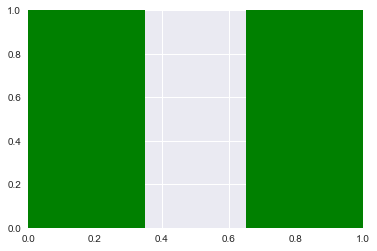

In [113]:
plt.bar(range(len(classifiers)), classifiers.values(),align='center', width=0.7, color = 'g')


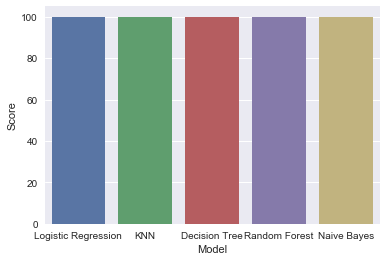

In [114]:
sns.barplot(x='Model',y='Score',data = models)